## Invasion Percolation example

In [1]:
import numpy
import openpnm
import matplotlib.pyplot as plt

%matplotlib inline

------------------------------------------------------------
CRITICAL   : front and back labels have been switched to obey the right-hand rule 
SOURCE     : openpnm.network.Cubic.__init__ 
TIME STAMP : 2022-03-28 10:31:45,386
------------------------------------------------------------


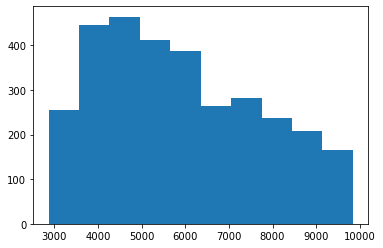

In [5]:
pn = openpnm.network.Cubic(shape=[40,40], spacing=1e-4)
geo = openpnm.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)
water = openpnm.phases.Water(network=pn)
phys = openpnm.physics.Standard(network=pn, phase=water, geometry=geo)
phys['pore.entry_pressure'] = 0.0

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(phys['throat.entry_pressure'])
plt.show()

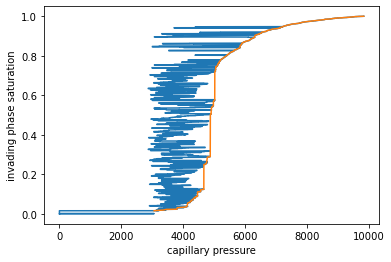

In [12]:
ipi = openpnm.algorithms.InvasionPercolation(network=pn, phase=water)
ipm = openpnm.algorithms.MixedInvasionPercolation(network=pn)
ipm.setup(phase=water)

inleti = ipi.set_inlets(pores=pn.pores('back'))
inletm = ipm.set_inlets(pores=pn.pores('back'))

ipi.run()
ipm.run()
intrusion_i = ipi.get_intrusion_data()
intrusion_m = ipm.get_intrusion_data()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(intrusion_i.Pcap, intrusion_i.S_tot, label='invasion')
ax.plot(intrusion_m.Pcap, intrusion_m.S_tot, label='mixed')
ax.set_xlabel('capillary pressure')
ax.set_ylabel('invading phase saturation')
plt.show()